                                **EP 4130/PH 6130 Assignment 3**
                                **Ranveer Sahu <ES21BTECH11025>**

In [53]:
import numpy as np
import matplotlib.pyplot as plt


In [54]:
from astroML.stats import median_sigmaG
from scipy.stats import chi2
from scipy.optimize import minimize, curve_fit

**Q1** In class, we showed histograms of standard deviation and σG of bootstrap
samples drawn from a Gaussian distribution with mean equal to 0 and
standard deviation equal to 1. Draw a similar histogram of median of
10,000 bootstrap samples drawn from the same Gaussian distribution.
According to http://tinyurl.com/h6p43o8, the standard deviation of
the sample median of a Gaussian distribution is equal to p π
2n
. Overlay a
Gaussian distribution on top of the histogram with mean equal to the mean
of the generated data sample and standard deviation equal to the standard
deviation of the median (Hint: Look up astroML.stats.median sigmaG.
Also note that you don’t have to draw 10,000 histograms, but only one
histogram consisting of 10,000 bootstrap resamples.)

In [55]:
!pip install astroML


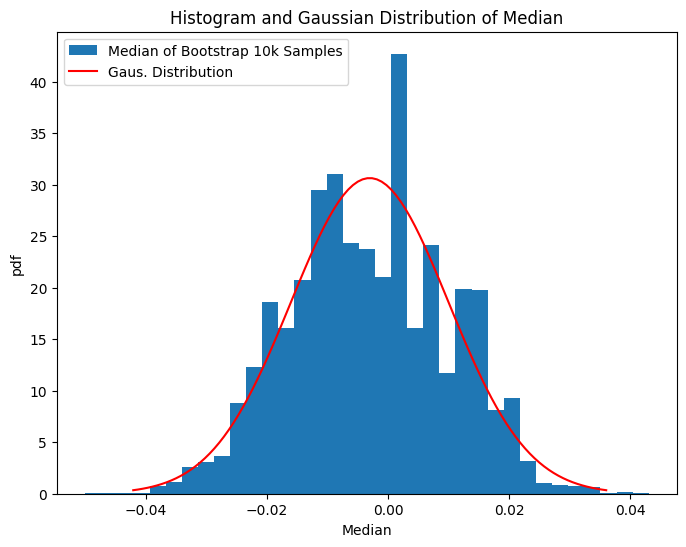

In [56]:
np.random.seed(42)

mn = 0
sd = 1
total_sample = 10000

data_sample = np.random.normal(mn, sd, total_sample)   #---- Generate a Gaus. dist.
total_boot_samples = 10000         #----- resampling data
boot_samples = np.random.choice(data_sample, (total_sample, total_boot_samples), replace=True)

# Calculate median for each above bootstrap samples
median_boot = np.median(boot_samples, axis=0)
fig, ax = plt.subplots(figsize=(8, 6)) #----- ploting guas. on bootstrap data
ax.hist(median_boot, bins=35, density=True, alpha=1, label='Median of Bootstrap 10k Samples')

# Overlay Gaus. distribution
mean_med = np.mean(median_boot)
std_dev_med = np.std(median_boot)
x = np.linspace(mean_med - 3 * std_dev_med, mean_med + 3 * std_dev_med, 100)
y = 1 / (std_dev_med * np.sqrt(2 * np.pi)) * np.exp(-(x - mean_med)**2 / (2 * std_dev_med**2))


ax.plot(x, y, label='Gaus. Distribution', color='red')
ax.set_title('Histogram and Gaussian Distribution of Median')
ax.set_xlabel('Median')
ax.set_ylabel('pdf')
ax.legend()
plt.show()

**Q2** arXiv:1008.4686, Exercise 1 on Page 5, except the last sentence of the question related to σ^2*m. (Hint : Use χ2 minimization to obtain best-fit values of b and m, instead of linear algebra. You can look up curve fit function in scipy.)

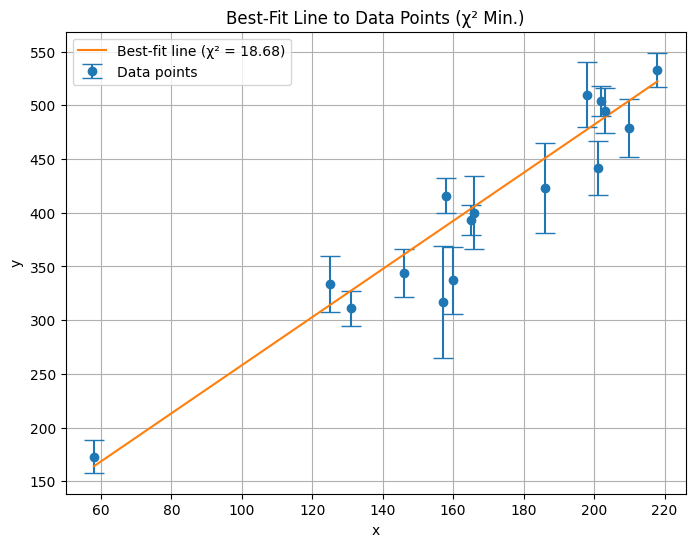

slope(m) = 2.2399208553933314
intercept(b) =  34.047723577096654
χ2 value = 18.680769911240873


In [62]:
x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sigma_y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

# function to fit
def func(x, m, b):
    return m * x + b

popt, _ = curve_fit(func, x, y, sigma=sigma_y, absolute_sigma=True) # ---χ2 minimization to find the best-fit param

m, b = popt           # ------ slope and intercept of best fit line respectively

chi2 = np.sum(((y - func(x, m, b)) / sigma_y)**2) #---- Calculate the χ2 value

# best-fit line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = func(x_fit, m, b)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=sigma_y, fmt='o', capsize=7, label='Data points') #---- error bar
plt.plot(x_fit, y_fit, label='Best-fit line (χ² = {:.2f})'.format(chi2)) #---- best fit line plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best-Fit Line to Data Points (χ² Min.)')
plt.legend()
plt.grid(True)
plt.show()

print("slope(m) =", m)
print("intercept(b) = ", b)
print("χ2 value =", chi2)

**Q3** Calculate the p-value for the four chi-square values for the plot shown in
class from astroMl book which can be found at https://www.astroml.
org/book_figures_1ed/chapter4/fig_chi2_eval.html.
(Hint : You can read off the χ2 values from the graph by multiplying by D.O.F.)

In [72]:
def calculate_chi2_and_pvalue(y_vals, y_errs, N):
    objective = lambda params: np.sum(((y_vals - params[0]) / y_errs) ** 2)

    # Perform minimization to find best-fit mean
    result = minimize(objective, [np.mean(y_vals)], method='Powell')
    mu_fit = result.x[0]
    chi2_val = np.sum(((y_vals - mu_fit) / y_errs) ** 2) #----- chi-square value calculation

    dof = N - 1 #------ degree of freedom

    p_value = 1 - chi2.pdf(chi2_val, dof) #--- Calculate the p-value using chi2.pdf

    return chi2_val, p_value

np.random.seed(1)
N = 50
L0 = 10
dL = 0.2
t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)

y_vals_list = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs_list = [dL, dL * 2, dL / 2, dL]
titles = ['correct errors', 'overestimated errors', 'underestimated errors', 'incorrect model']

for i in range(4):
    chi2_val, p_val = calculate_chi2_and_pvalue(y_vals_list[i], y_errs_list[i], N)
    print(f'for Chi-sqr value = {chi2_val} p-value is = {p_val}\n')


for Chi-sqr value = 47.005168881363566 p-value is = 0.9589978982667309

for Chi-sqr value = 11.751292220340892 p-value is = 0.9999999868271917

for Chi-sqr value = 188.02067552545427 p-value is = 1.0

for Chi-sqr value = 139.5360944877475 p-value is = 0.9999999999578612

